#  Introduction to Regression with Neural Networks in TensorFlow 

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on the some other combination of variables,predicting a number.

Specifically, we're going to go through doing the following with TensorFlow:

- Architecture of a regression model
- Input shapes and output shapes
  - X: features/data (inputs)
  - y: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
    - Visualizng the model ("visualize, visualize, visualize")
    - Looking at training curves
    - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

## Typical Architecture of a Neural Network Regression model

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)|

In [ ]:
# Import TensorFlow 
import tensorflow as tf
print(tf.__version__)

2.8.0


## Creating data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create features 
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

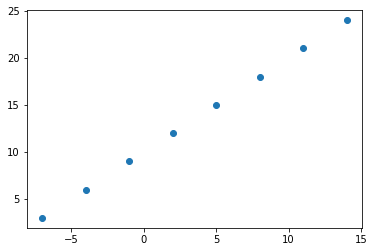

In [ ]:
# Visualize it
plt.scatter(X,y)

In [ ]:
# The relationship between our input features (independent variable) and labels (dependent variable)
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem 
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

We want to use single input feature of X to predict 1 value of y 

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
# Take a single example of X
input_shape = X[0].shape 
# Take a single example of y
output_shape = y[0].shape
input_shape, output_shape # these are both scalars (no shape)

((), ())

This is because no matter what kind of data we pass to our model, it's always going to take as input and return as ouput some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specificially a rank 0 tensor or a scalar.

In our case, we're trying to build a model to predict the pattern between `X[0]` equalling `-7.0` and `y[0]` equalling `3.0`.

In [ ]:
# Turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape # rank 0 tensors, scalars

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow 

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a Deep Learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metircs (what we can use to interpret the performance of our model) 
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels) 

### Sequential API
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

`Sequential` groups a linear stack of layers into a tf.keras.Model.

`Sequential` provides training and inference features on this model.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE - Mean Absolute Error 
              optimizer=tf.keras.optimizers.SGD(), # SGD - Stochastic Gradient Decent
              metrics=["mae"]) 

# 3. Fit the model 
model.fit(tf.expand_dims(X,axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 928ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y 

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model 
y_pred = model.predict([17.0])
y_pred 

array([[12.716021]], dtype=float32)

## Improving our model

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Lets rebuild our model

# 1. Create the model
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

# 2. Compile the model 
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 683ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] -

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# let's see if our model's prediction has improved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model
# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 11ms/s

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's try to make a prediction 
model.predict([17.0])

array([[31.223137]], dtype=float32)

Hmm, why the prediction is not accurate?? even though the metrics of the model are really good - mae: 3.7213.

This is because that our model could overfit. So, it is learning the training data too well. When it sees a new X, it's just relating back what it knows based on the training data and the error that it is producing is not really valid representation of what it is actually doing. 

In [ ]:
# Let's build another model
# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50,activation=None), # Change to 50 units
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01), # Change to Adam optimizer and set learning_rate
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 12.2895 - mae: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 11.5828 - mae: 11.5828
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 10.8658 - mae: 10.8658
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 10.1378 - mae: 10.1378
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.3973 - mae: 9.3973
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 8.6426 - mae: 8.6426
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.8717 - mae: 7.8717
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.0828 - mae: 7.0828
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8696 - mae: 6.8696
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.2795 - mae: 7.2795
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 7.5933

In [ ]:
# Let's try to make a prediction 
model.predict([17.0])

array([[27.890127]], dtype=float32)

## Evaluating a model

In practice, a typical workflow we will go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> .....
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one

When it comes to evaluation, there are 3 words you should memorize: 

> Visualize, Visulize, Visualize

It's a good idea to visualize:
- **The data**- what data are we working with? What does it look like ? 
- **The model itself** - what does our model look like ? 
- **The training of a model** - how does a model perform while it learns ?
- **The predictions of the model** - how do the predictions of a model line up agains the ground truth (the original labels).

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10 # This is the pattern for our model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

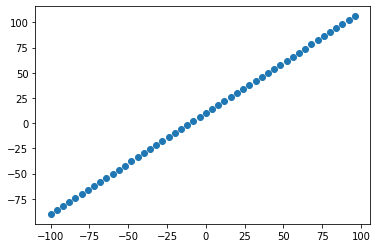

In [ ]:
# Visualize the data 
plt.scatter(X,y)

### Three sets of data

- **Training set** - the model learns from this data, which is typically 70-80% of the total data available 
- **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
- **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [ ]:
# Check the length of how many samples we have 
len(X)

50

In [ ]:
# Split the data into train and test sets 
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40] 
X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualize the data

Now we've got our data in training and test sets.. let's visualize it! 

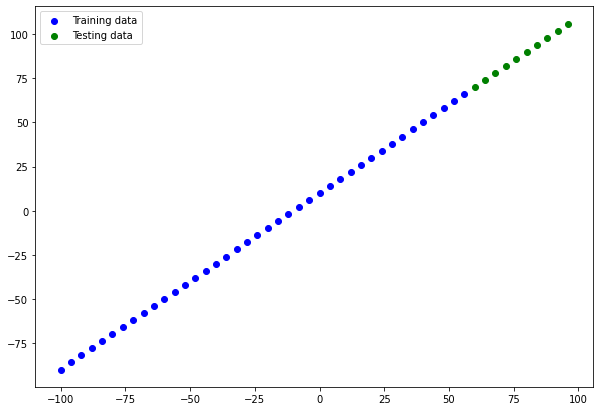

In [ ]:
plt.figure(figsize=(10,7))
# Plot traning data in blue 
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend 
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # Input Shape 
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) # train for 100 epochs not 10

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 47.1280 - mae: 47.1280
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 15.7179 - mae: 15.7179
Epoch 3/100
2/2 [==============================] - 0s 20ms/step - loss: 15.0809 - mae: 15.0809
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.1832 - mae: 8.1832
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.6664 - mae: 10.6664
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.8707 - mae: 9.8707
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.9399 - mae: 8.9399
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0851 - mae: 9.0851
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.6577 - mae: 19.6577
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.6254 - mae: 10.6254
Epoch 11/100
2/2 [==============================] - 0s 26ms/step 

## Visualizing the model

We can let our model know the input shape of our data using the input_shape parameter to the first layer (usually if input_shape isn't defined, Keras tries to figure it out automatically).

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # The shape might be different depending on what shape of input data we are passing
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Show the model 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters of each layer.
- **Total params** - total number of parameters in the model.
- **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
- **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

Playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)).

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=[1]) # The shape might be different depending on what shape of input data we are passing
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Show the model 
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1]) # The shape might be different depending on what shape of input data we are passing
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Show the model 
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


It looks like when we are increasing the number of hidden units in the Dense layer (fully-connected layer), the number of total params & trainable params increases increases number of hidden units by 2. There are 2 trainable parameters per Dense hidden unit.

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # The shape might be different depending on what shape of input data we are passing
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Let's fit our model to the training data
model.fit(X_train,y_train, epochs=100, verbose=0)

In [ ]:
# Show the model 
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Another way of visualizing our model -> using TensorFlow plot function.

In [ ]:
from tensorflow.keras.utils import plot_model

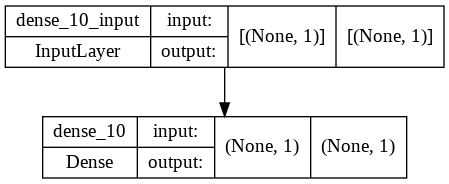

In [ ]:
# Plot the model
plot_model(model=model, show_shapes=True)

We can specify the names for:
- Model
- Dense (Hidden) Layer

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # The shape might be different depending on what shape of input data we are passing
    tf.keras.layers.Dense(1, input_shape=[1], name="output_layer")
],name="Models_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Show model summary
model.summary()

Model: "Models_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's fit our model to the training data
model.fit(X_train,y_train, epochs=100, verbose=0)

In [ ]:
# Show model summary
model.summary()

Model: "Models_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


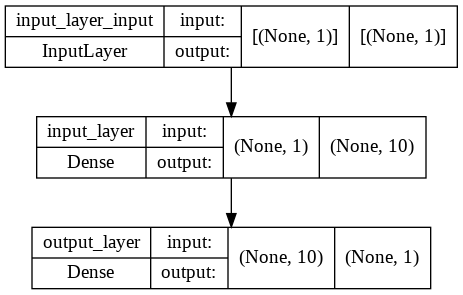

In [ ]:
plot_model(model=model, show_shapes=True)

## Visualizing our model's predictions

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often we'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. model's **predictions**).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
# Model's predictions
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
# Ground truth
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note**: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function. 


In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  """
  Plots training, test data and compres predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r",label="Predictions")
  # Show the legend
  plt.legend();

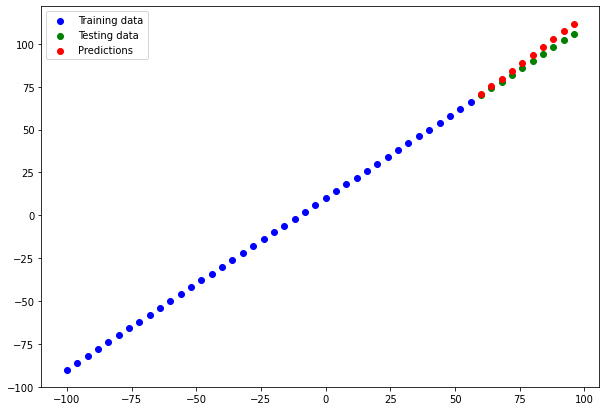

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluating our model's predictions with Regression Evaluation Metrics

Depending on the problem we're working on, there will be different evaluation metrics to evaluate our model's performance.

Since we're working on a regression, two of the main metrics:
- **MAE** - Mean Absolute Error, "on average, how wrong is each of my model's predictions"
- **MSE** - Mean Squared Error, "square the average errors".

In [ ]:
# Evaluate the model on the test - Quick way
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 369ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

Calculate the mean absolute error:

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Note that `y_pred` and `y_test` have diffent shapes. `y_pred` has an extra dimension. 

In [ ]:
# Removing extra dimension
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred)) # We have got the test metrics for each prediction

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred)) 
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

Calculate the mean squared error

In [ ]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# Make some functions to reuse MAE and MSE

def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> .....
```
Ways to improve our model:
1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between featrues and labels).
2. Make your model larger (using more complex model) - this might come in the form of more layers or more hidden units in each layer. 
3. Train for longer - give your model more of a chance to find patterns in the data.

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

Let's do 3 modelling experiments:
1. `model_1` - same as the original model: 1 layers, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

🔑 **Note**: When you are running modelling experiments, start with a baseline model, and then change one of the parameters for the next experiment, do the same for the next experiment and so on. 

**Build `model_1`**

- Sames as the original model: 1 layer, trained for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/step 

Make and plot predictions for model_1

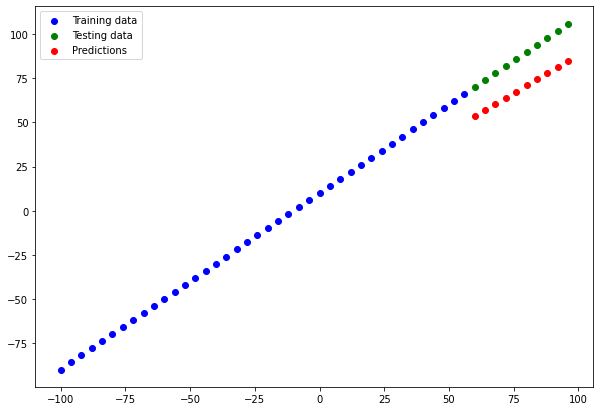

In [ ]:
# Make predictions
y_pred_1 = model_1.predict(X_test)
# Plot predictions
plot_predictions(predictions=y_pred_1)

There's quite large difference between ground truth and our model's predictions.

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_pred_1)
mse_1 = mse(y_test,y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**

- 2 dense layers, trained for 100 epochs.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [========================

Make and plot predictions for model_2

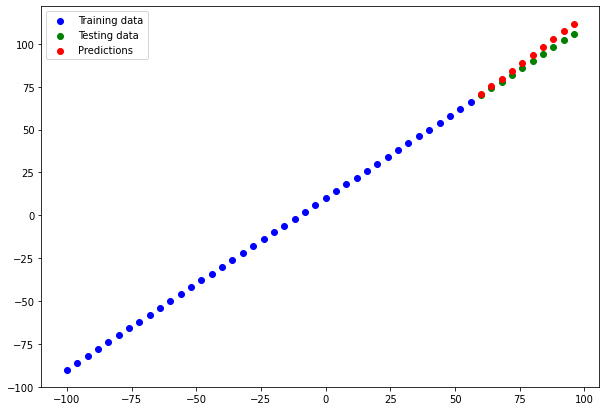

In [ ]:
# Make predictions
y_pred_2 = model_2.predict(X_test)
# Plot predictions
plot_predictions(predictions=y_pred_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test,y_pred_2)
mse_2 = mse(y_test,y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build `model_3`**

- 2 dense layers, trained for 500 epochs.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 8ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/500
2/2 [==============================] - 0s 20ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/500
2/2 [=======================

Make and plot predictions of model_3

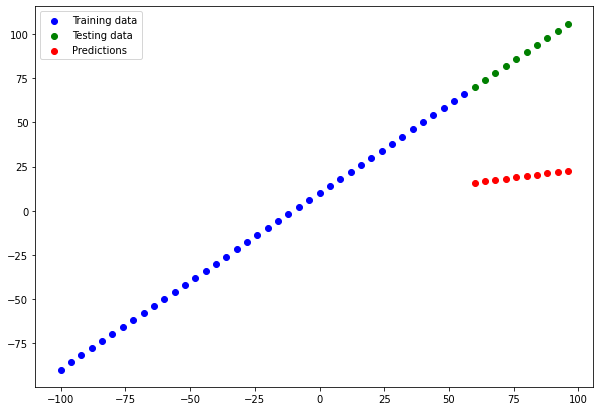

In [ ]:
# Make predictions
y_pred_3 = model_3.predict(X_test)
# Plot predictions
plot_predictions(predictions=y_pred_3)

Looks like our model overfitted.

In [ ]:
# Calculate model_2 evaluation metrics
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test,y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

Let's compare our model's results using Pandas DataFrame

In [ ]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(),mse_1.numpy()],
                  ["model_2",mae_2.numpy(),mse_2.numpy()],
                  ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


Looks like `model_2` performed best.

In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure our which don't work and in turn, get closer to figuring out what does work. Remember the Machine Learning Practitioner's motto: "Experiment, experiment, experiment"

## Tracking your experiments

One really good habit in Machine Learning Modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us! 

**Resource**: As you build more models, you'll want to look into using:
- TensorBoard - a component of the TensorFlow Library to help track modelling experiments 
- Weights & Biases - a tool for tracking all kinds of Machine Learning Experiemnts (plugs straight into TensorFlow)

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in:
- Web Application
- Mobile App

In TensorFlow, there are 2 formats of saved models:
1. SavedModel format: The SavedModel format is another way to serialize models. Models saved in this format can be restored using `tf.keras.models.load_model` and are compatible with TensorFlow Serving. 
2. HDF5 format: Keras provides a basic save format using the `HDF5` standard.

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Save model using the HDF5 format
model_2.save('best_model_HDF5_format.h5')

## Loading in saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_pred = model_2.predict(X_test)
loaded_SavedModel_format_pred = loaded_SavedModel_format.predict(X_test)
model_2_pred == loaded_SavedModel_format_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true=y_test,y_pred=model_2_pred) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load in the HDF5 format model
loaded_hdf5_format = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_hdf5_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_pred = model_2.predict(X_test)
loaded_hdf5_format_pred = loaded_hdf5_format.predict(X_test)
model_2_pred == loaded_hdf5_format_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true=y_test,y_pred=model_2_pred) == mae(y_true=y_test, y_pred=loaded_hdf5_format_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

# Large Example

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict **the cost of medical insurance** for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

> 🔑 **Note:** When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Just as we're doing now, learn foundations, put them to work with different problems. Every time you work on something new, it's a good idea to search for something like "problem X example with Python/TensorFlow" where you substitute X for your problem.

### Setting up the project

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

### Loading in the data

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Preprocessing: Transforming categorical features

We're going to have to transform the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs). Therefore, we are going to use Pandas `get_dummies()` function that does One-hot Encoding.

In [ ]:
# Perform One-hot Encoding on categorical variables
insurance_hot_encoded = pd.get_dummies(insurance)
insurance_hot_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Next steps are:
- Create X & y values (features and labels)
- Create training and test datasets 
- Build a neural network - baseline model

### Creating X and y values

In [ ]:
# Create X and y values
X = insurance_hot_encoded.drop("charges",axis=1)
y = insurance_hot_encoded['charges']

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Splitting the data into training and test datasets

In [ ]:
# Check the length of how many samples we have 
len(X)

1338

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

### Build a Neural Network model - baseline model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
base_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
base_model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
base_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# Check the results of the insurance model on the test data
base_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

## Improving Baseline Regression Model

It looks like our model isn't performing too well..

Let's improve our model, we will run 2 experiments:
1. Add an extra layer with more hidden units 
2. Train for longer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Didn't work with SGD() - model returned NaN, maybe the model was too complex??
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

> 

In [ ]:
# Evaluate the second model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Didn't work with SGD() - model returned NaN, maybe the model was too complex??
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
# Evaluate the third model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'Epochs')

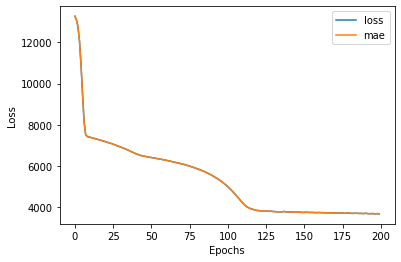

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

## Preprocessing Data (Normalization and Standardization)

**Normalization** is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. 

**Standardization** is the process of rescaling the attributes so that they have mean as 0 and variance as 1. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.


> In terms of scaling values, neural networks tend to prefer normalization. If you are not sure on which to use, you could try both and see which performs better.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region']) # apply One-Hot Encoding to theses columns
)

# Create X & y 
X = insurance.drop('charges',axis=1)
y = insurance['charges']

# Build Train and Test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fir the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and One-hot Encoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now? 
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# Build a neural network model to fit our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 10ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.9

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]